In [1]:
import twitter
consumer_key = "<Your Consumer Key Here>"
consumer_secret = "<Your Consumer Secret Here>"
access_token = "<Your Access Token Here>"
access_token_secret = "<Your Access Token Secret Here>"
authorization = twitter.OAuth(access_token, access_token_secret, consumer_key, consumer_secret)
t = twitter.Twitter(auth=authorization, retry=True)
    
import json
original_users = []
tweets = []
user_ids = {}
'''搜索包含python的消息，遍历搜索结果：'''
search_results = t.search.tweets(q="python", count=100)['statuses']
for tweet in search_results:
    if 'text' in tweet:
        original_users.append(tweet['user']['screen_name'])
        user_ids[tweet['user']['screen_name']] = tweet['user']['id']
        tweets.append(tweet['text'])

KeyboardInterrupt: 

In [16]:
with open(_filename) as inf:
    for line in inf:
        if len(line.strip()) == 0:
            continue
        print(type(json.loads(line)), type(json.loads(line)['user']))
        print(json.loads(line)['user'],'\n',json.loads(line)['text'])
# 可见，user是字典

<class 'dict'> <class 'dict'>
{'id': 398059631, 'id_str': '398059631', 'name': 'Teresa de la Torre', 'screen_name': 'tdelatorreh', 'location': '', 'description': 'Software Developer, OpenSource, Python, @PyLadies_ES...', 'url': 'http://t.co/zjz3st6bh8', 'entities': {'url': {'urls': [{'url': 'http://t.co/zjz3st6bh8', 'expanded_url': 'http://kaleidos.net/0F0F0F/', 'display_url': 'kaleidos.net/0F0F0F/', 'indices': [0, 22]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 515, 'friends_count': 351, 'listed_count': 39, 'created_at': 'Tue Oct 25 14:34:50 +0000 2011', 'favourites_count': 1185, 'utc_offset': 3600, 'time_zone': 'Madrid', 'geo_enabled': False, 'verified': False, 'statuses_count': 1354, 'lang': 'es', 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_background_color': '131516', 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme14/bg.gif', 'profile_background_image_url_https': 'https://abs

{'id': 15332024, 'id_str': '15332024', 'name': '肖智博', 'screen_name': 'ZhiboXiao', 'location': '', 'description': '', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 102, 'friends_count': 244, 'listed_count': 24, 'created_at': 'Sun Jul 06 10:53:02 +0000 2008', 'favourites_count': 365, 'utc_offset': 28800, 'time_zone': 'Singapore', 'geo_enabled': True, 'verified': False, 'statuses_count': 2655, 'lang': 'zh-cn', 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_background_color': 'EDECE9', 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme3/bg.gif', 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme3/bg.gif', 'profile_background_tile': False, 'profile_image_url': 'http://pbs.twimg.com/profile_images/378800000505113268/3da90636328fe7a9b1d4f4238561f1a4_normal.jpeg', 'profile_image_url_https': 'https://pbs.twimg.com/profile_images/3788000005051132

In [54]:
import os
import json
data_folder = os.path.join(os.path.expanduser("~"), "ANACONDA DM", "chapter6")
_filename = os.path.join(data_folder, "python_tweets.json")
original_users = []
tweets = []
user_ids = {}

with open(_filename) as inf:
    for line in inf:
        if len(line.strip()) == 0:
            continue
        original_users.append(json.loads(line)['user']['screen_name'])
        user_ids[json.loads(line)['user']['screen_name']] = json.loads(line)['user']['id']
        tweets.append(json.loads(line)['text'])
print(len(tweets),len(user_ids), len(original_users), len(set(original_users)))

150 67 150 67


In [3]:
## 因为要调用这个类
from sklearn.base import TransformerMixin
from nltk import word_tokenize
class NLTKBOW(TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return [{word: True for word in word_tokenize(document)} for document in X]
'''加载第六章的分类模型'''    
from sklearn.externals import joblib
model_filename = os.path.join(os.path.expanduser("~"), "ANACONDA DM", "chapter6", "python_context.pkl")
context_classifier = joblib.load(model_filename)
y_pred = context_classifier.predict(tweets)
relevant_tweets = [tweets[i] for i in range(len(tweets)) if y_pred[i] == 1]
relevant_users = [original_users[i] for i in range(len(tweets)) if y_pred[i] == 1]

In [58]:
print(len(relevant_users))
print(len(set(relevant_users)))

88
38


In [ ]:
##  调用相应API：friends/ids获取好友信息
import time
def get_friends(t, user_id):
    friends = []
    cursor = -1 
    #当向Twitter请求数据时，不仅返回所需数据，还返回数据类型为整数的游标， Twitter用游标跟踪每一次请求。
    #如果没有更多内容，游标为0；否则，可以使用游标获得下一页数据。开始把游标设置为1，表明是数据的开始：
    while cursor != 0:
        try:
            results = t.friends.ids(user_id=user_id, cursor=cursor, count=5000)
            friends.extend([friend for friend in results['ids']])
            cursor = results['next_cursor']
            if len(friends) >= 10000:
                break
        except TypeError as e:
            if results is None:
                print("You probably reached your API limit, waiting for 5 minutes")
                sys.stdout.flush()
                time.sleep(5*60) # 5 minute wait
            else:
                raise e
        except twitter.TwitterHTTPError as e:
            break
        finally:
            time.sleep(60)
    return friends


In [ ]:
##  构建网络
friends = {}
'''遍历用户名'''
for screen_name in relevant_users:
    '''拿到用户名的ID号'''
    user_id = user_ids[screen_name]
    '''建立朋友字典'''
    friends[user_id] = get_friends(t, user_id)
'''删除没有朋友的ID号'''
friends = {user_id:friends[user_id] for user_id in friends if len(friends[user_id]) > 0}

from collections import defaultdict
def count_friends(friends):
    friend_count = defaultdict(int)
    for friend_list in friends.values():
        for friend in friend_list:
            '''被多少人关注'''
            friend_count[friend] += 1
    return friend_count

friend_count= count_friends(friends)
from operator import itemgetter
'''对关注数排序'''
best_friends = sorted(friend_count.items(), key=itemgetter(1), reverse=True)

'''建立一循环，凑够150个用户的好友数据后，该循环就会结束。遍历best_friends字典（按照在现有用户中的好友数多少排序），
找到还没有获取好友列表的用户，然后获取他的好友列表，更新friends列表。最后，再次查找谁是最受欢迎的'''
while len(friends) < 150:
    for user_id, count in best_friends:
        if user_id not in friends:
            break
    friends[user_id] = get_friends(t, user_id)
    for friend in friends[user_id]:
        friend_count[friend] += 1
    best_friends = sorted(friend_count.items(), key=itemgetter(1), reverse=True)

'''采集数据大约要运行2h，最好把中间结果保存下来，因为有时不得不关闭计算机。使用json库，就可以轻松把好友字典保存到文件里：'''
import json
friends_filename = os.path.join(data_folder, "python_friends.json")
with open(friends_filename, 'w') as outf:
    json.dump(friends, outf)
'''使用json.load函数，从文件中加载数据：'''    
with open(friends_filename) as inf:
    friends = json.load(inf)

In [60]:
#由于被墙，只好自己在这些人中建立关系网；建立一个字典key=id，value=id of friends
#  88条相关消息中只有38个id，如果是相关关系网，可以从这38人中建立，但是，现在人数较少，可从总共67个人中建立

from sklearn.utils import check_random_state
import random

friends = {}
for name in original_users:
    
    n_random = random.randint(1,66)
    key = user_ids[name]
    #print(set(key))  error 'int' object is not iterable  cant set a single int must use with ",", set((5,))  
    value = random.sample(set(user_ids.values())-set((key,)), n_random)
    friends[key] = value

#   list的remove（）不能用？？？    
#   ['2','5','9'].remove("2") = None????
#   type(['2','5','9'].remove("2")) = Nonetype????
#   A:  remove是一个操作 
#       a = ['2','5','9']
#       a.remove('2')
#       print(a) =['5', '9']

from collections import defaultdict
def count_friends(friends):
    friend_count = defaultdict(int)
    for friend_list in friends.values():
        for friend in friend_list:
            '''被多少人关注'''
            friend_count[friend] += 1
    return friend_count

friend_count= count_friends(friends)
from operator import itemgetter
'''对关注数排序'''
best_friends = sorted(friend_count.items(), key=itemgetter(1), reverse=True)

In [ ]:


'''建立一循环，凑够150个用户的好友数据后，该循环就会结束。遍历best_friends字典（按照在现有用户中的好友数多少排序），
找到还没有获取好友列表的用户，然后获取他的好友列表，更新friends列表。最后，再次查找谁是最受欢迎的'''
while len(friends) < 150:
    for user_id, count in best_friends:
        if user_id not in friends:
            break
    friends[user_id] = get_friends(t, user_id)
    for friend in friends[user_id]:
        friend_count[friend] += 1
    best_friends = sorted(friend_count.items(), key=itemgetter(1), reverse=True)

'''采集数据大约要运行2h，最好把中间结果保存下来，因为有时不得不关闭计算机。使用json库，就可以轻松把好友字典保存到文件里：'''
import json
friends_filename = os.path.join(data_folder, "python_friends.json")
with open(friends_filename, 'w') as outf:
    json.dump(friends, outf)
'''使用json.load函数，从文件中加载数据：'''    
with open(friends_filename) as inf:
    friends = json.load(inf)

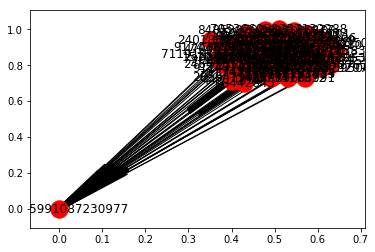

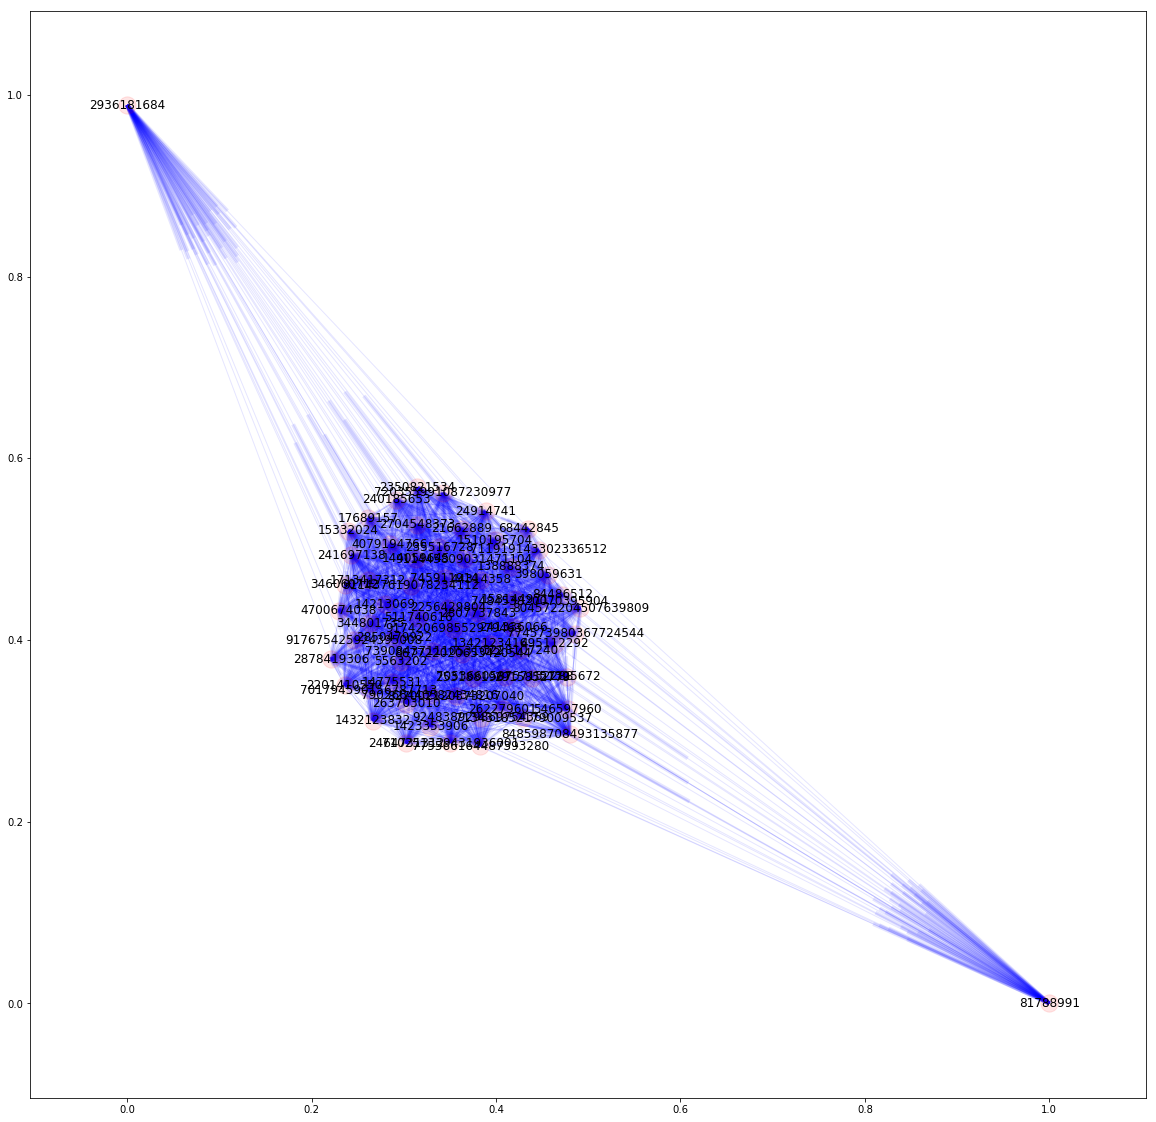

In [64]:
##  创建图
import networkx as nx
G = nx.DiGraph()
'''只将150名核心用户彼此间的好友关系绘制成图像，其他好友关系由于数据量很大难以可视化。把核心用户作为顶点，添加到图中。'''
main_users = friends.keys()
G.add_nodes_from(main_users)
'''接着要创建边。如果第二个用户是第一个用户的好友，那么就在这两个顶点之间建立一条边。遍历所有的核心用户：'''
for user_id in friends:
    for friend in friends[user_id]:
        if friend in main_users:
            G.add_edge(user_id, friend)
            
%matplotlib inline
nx.draw_networkx(G)

from matplotlib import pyplot as plt
plt.figure(3,figsize=(20,20))
nx.draw_networkx(G, alpha=0.1, edge_color='b')

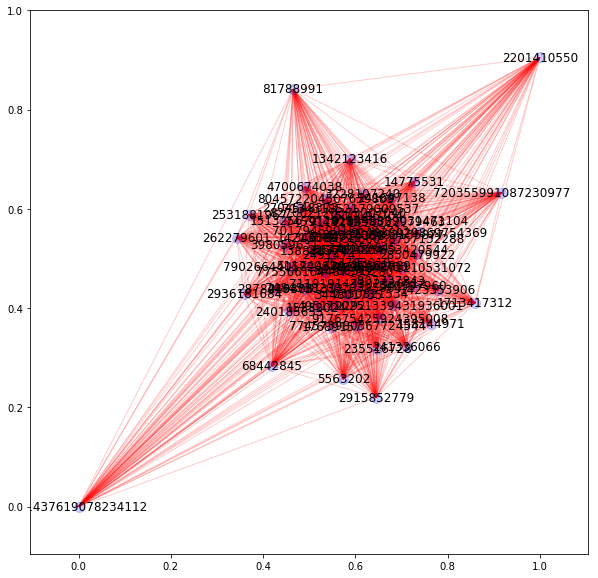

In [119]:
##  创建用户相似度图
friends = {user: set(friends[user]) for user in friends}
#print(friends.values())
def compute_similarity(friends1, friends2):
    return len(friends1 & friends2) / len(friends1 | friends2) #杰卡德相似系数（Jaccard Similarity）

def create_graph(friends, threshold=0):
    G = nx.Graph()
    for user1 in friends.keys():
        for user2 in friends.keys():
            if user1 == user2:
                continue
            else:
                weight = compute_similarity(friends[user1], friends[user2])
                '''画图'''
                if weight >= threshold:
                    G.add_node(user1)
                    G.add_node(user2)
                    G.add_edge(user1, user2, weight=weight)
    return G

plt.figure(figsize=(10,10))
G = create_graph(friends)
nx.draw_networkx(G, alpha=0.2, edge_color='r', node_color='b',node_size=100)

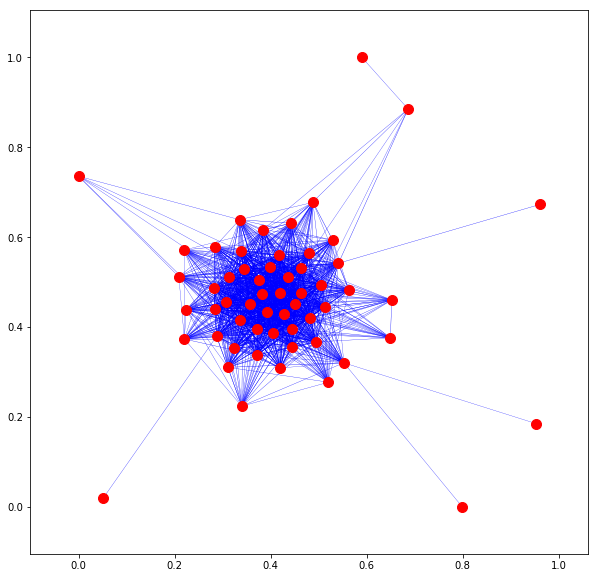

In [131]:
plt.figure(figsize=(10,10))
'''使用spring_layout布局方法：'''
pos = nx.spring_layout(G)
'''使用pos布局方法，确定顶点位置：'''
nx.draw_networkx_nodes(G, pos, node_size=100)
'''接下来，绘制边。遍历图中的每条边，获得其权重：'''
edgewidth = [ d['weight'] for (u,v,d) in G.edges(data=True)]
'''绘制各条边：'''
nx.draw_networkx_edges(G, pos, width=edgewidth, edge_color='b')

In [163]:
##  寻找子图
##  连同分支
G = create_graph(friends, 0.1)
sub_graphs = nx.connected_component_subgraphs(G)
for i, sub_graph in enumerate(sub_graphs):
    n_nodes = len(sub_graph.nodes())
    print("Subgraph {0} has {1} nodes".format(i, n_nodes))
print("create_graph(friends, 0.1)")
G = create_graph(friends, 0.4)
sub_graphs = nx.connected_component_subgraphs(G)
for i, sub_graph in enumerate(sub_graphs):
    print(i)
    print(sub_graph)
    n_nodes = len(sub_graph.nodes())
    print("Subgraph {0} has {1} nodes".format(i, n_nodes))
print('create_graph(friends, 0.5)')
'''可以用不同的颜色把所有连通分支都画出来。因为各连通分支之间没有连接，因此没必要把它们画到一张图中。

sub_graphs是生成器而不是连通分支列表。用nx.number_connected_components找出连通分支的总数；NetworkX无法使用len函数。
'''


Subgraph 0 has 67 nodes
create_graph(friends, 0.1)
0

Subgraph 0 has 43 nodes
create_graph(friends, 0.5)


'可以用不同的颜色把所有连通分支都画出来。因为各连通分支之间没有连接，因此没必要把它们画到一张图中。\n\nsub_graphs是生成器而不是连通分支列表。用nx.number_connected_components找出连通分支的总数；NetworkX无法使用len函数。\n'

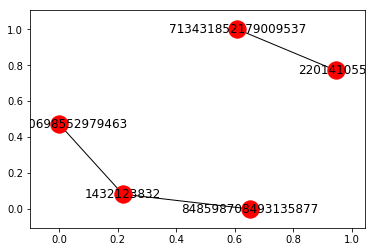

0
Subgraph 0 has 2 nodes
1
Subgraph 1 has 3 nodes


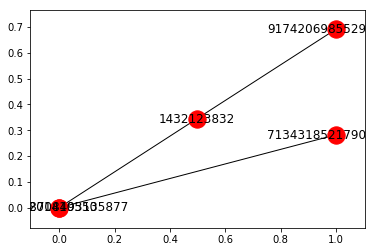

In [184]:
G = create_graph(friends, 0.9)
sub_graphs = nx.connected_component_subgraphs(G)
nx.draw_networkx(G)
plt.show()
for i, sub_graph in enumerate(sub_graphs):
    print(i)
    nx.draw_networkx(sub_graph)
    n_nodes = len(sub_graph.nodes())
    print("Subgraph {0} has {1} nodes".format(i, n_nodes))

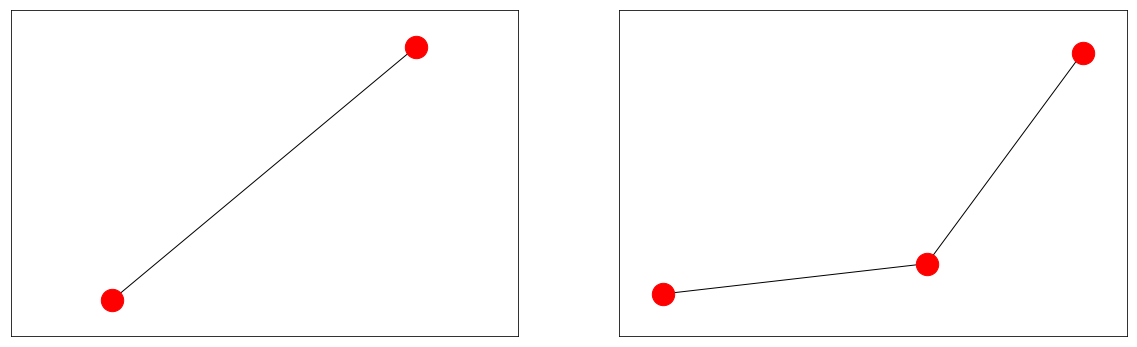

In [190]:
sub_graphs = nx.connected_component_subgraphs(G)
n_subgraphs = nx.number_connected_components(G)
fig = plt.figure(figsize=(20, (n_subgraphs * 3)))
for i, sub_graph in enumerate(sub_graphs):
    ax = fig.add_subplot(int(n_subgraphs / 2), 2, i+1)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    '''绘制顶点和边（用ax参数绘制相应的子图）。绘图之前需要设置好布局：'''
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos, sub_graph.nodes(), ax=ax, node_size=500)
    nx.draw_networkx_edges(G, pos, sub_graph.edges(), ax=ax)

In [192]:
##  寻找子图
##  优化参数选取准则
def compute_silhouette(threshold, friends):
    G = create_graph(friends, threshold=threshold)
    if len(G.nodes()) < 2: #检查顶点数是否小于2
        return -99
    sub_graphs = nx.connected_component_subgraphs(G)
    if not (2 <= nx.number_connected_components(G) < len(G.nodes()) - 1): 
        #轮廓系数的定义还要求至少有两个连通分支（才能计算不同簇之间的距离），并且至少其中一个连通分支有两个顶点（计算簇内距离）。
        return -99
    
    '''需要获取标识着顶点被分到哪个连通分支的标签。遍历所有的连通分支，用字典保存顶点及其所属的连通分支'''
    label_dict = {}
    for i, sub_graph in enumerate(sub_graphs):
        for node in sub_graph.nodes():
            label_dict[node] = i
    '''遍历图中所有顶点，依次获取到每个顶点的标签。需要分两步来做，先按一定顺序取到图，再遍历。因为图中顶点没有明确的顺序，
    但是只要没有改动图，顶点会维持现有顺序。这就表明，只要没有改动图，在图上调用.nodes()方法，返回的顶点顺序总是一致的。代码如下：'''
    labels = np.array([label_dict[node] for node in G.nodes()])
    '''轮廓系数函数接收的是距离矩阵，因此，要想办法把图转换为矩阵。首先，使用NetworkX的to_scipy_sparse_matrix函数把图转换为矩阵形式：'''
    #  此处的转化和第八章有区别？？
    #  图转化后是表示相似度？？原来在图中只是边的宽度表示相似度大小
    #  表示成相似度还能用1-X来表示距离
    X = nx.to_scipy_sparse_matrix(G).todense()
    X = 1 - X
    return silhouette_score(X, labels, metric='precomputed')
def inverted_silhouette(threshold, friends):
    return -compute_silhouette(threshold, friends)
from scipy.optimize import minimize
result = minimize(inverted_silhouette, 0.1, args=(friends,))
'''
 inverted_silhouette： 对我们要最小化的函数compute_silhouette进行取反操作，将其变为损失函数。
 0.1：我们一开始猜测阈值为0.1时，函数取到最小值。
 options={'maxiter':10}：只进行10轮迭代（增加迭代次数，效果可能更好，但运行时间也会相应增加）。
 method='nelder-mead'：使用下山单纯形法（Nelder-Mead）优化方法（SciPy提供的优化方法）。
 args=(friends,)：向被优化的函数传入friends字典参数。
'''

"\n\uf071 inverted_silhouette： 对我们要最小化的函数compute_silhouette进行取反操作，将其变为损失函数。\n\uf071 0.1：我们一开始猜测阈值为0.1时，函数取到最小值。\n\uf071 options={'maxiter':10}：只进行10轮迭代（增加迭代次数，效果可能更好，但运行时间也会相应增加）。\n\uf071 method='nelder-mead'：使用下山单纯形法（Nelder-Mead）优化方法（SciPy提供的优化方法）。\n\uf071 args=(friends,)：向被优化的函数传入friends字典参数。\n"